https://www.kaggle.com/c/boston-housing


### Boston House Prices dataset

#### Data Set Characteristics:

:Number of Instances: 506 

:Number of Attributes: 13 numeric/categorical

:Median Value (attribute 14) is usually the target

:Attribute Information (in order):
    - CRIM     per capita crime rate by town
    - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS    proportion of non-retail business acres per town
    - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    - NOX      nitric oxides concentration (parts per 10 million)
    - RM       average number of rooms per dwelling
    - AGE      proportion of owner-occupied units built prior to 1940
    - DIS      weighted distances to five Boston employment centres
    - RAD      index of accessibility to radial highways
    - TAX      full-value property-tax rate per $10,000
    - PTRATIO  pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

:Missing Attribute Values: None

:Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset. http://archive.ics.uci.edu/ml/datasets/Housing

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression problems.



In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


C:\Users\keert\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# loading boston datasets
from sklearn.datasets import load_boston
import pandas as pd

In [3]:
boston_data = pd.DataFrame(data=load_boston().data)
price_data = load_boston().target

X_train,X_test,y_train,y_test = train_test_split(boston_data,price_data,
                                                 test_size = 0.33,random_state= 5)

In [4]:
# applying column standardization on train and test data
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [5]:
#preparing training data for manual sgd regressor
manual_train=pd.DataFrame(data=X_train)
manual_train['price'] = y_train

In [6]:
manual_train.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,0.911839,-0.502419,1.072305,-0.256978,1.633548,0.486034,0.962774,-0.823477,1.655334,1.552100,0.808078,-2.842959,1.523203,13.4
1,-0.411727,-0.502419,-1.129795,-0.256978,-0.552451,1.028078,0.668619,-0.183274,-0.871371,-0.802704,-0.304174,0.427436,-0.995240,23.6


In [7]:
# converting to numpy array, which will be available for both SGDRegressor of sklearn and manual sgd regressor
X_test=np.array(X_test)
y_test=np.array(y_test)

In [8]:
results=pd.DataFrame(columns=['S_No', 'Algorithm', 'Alpha', 'LearningRateVariation',
                              'Learning Rate', 'Power_t', 'No. of Iterations', 
                              'Mean Squared Error','Weights'])

## SGDRegressor vs Manual SGD

### A) Fixing learning rate(eta0) to 0.01 and Learning Rate Variation='Constant'

### SGDRegressor

In [9]:
#the functioning of this function is to use sklearn SGDRegressor and predict the price
#this function takes alpha, learning rate variation , initial learning rate(eta0), number of iteration , power_t, and all test and train data as an argument
#this function returns weight, intercept and mean squared error
def sklearn_sgd(alpha, lr_rate_variation, eta0=0.01, power_t=0.25, n_iter=100, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    #scatter plot
    plt.scatter(y_test,y_pred)
    plt.title('Plot between Actual y and Predicted y')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    
    
    ## Mean Squared Error(MSE)   
    mse=mean_squared_error(y_test,y_pred)
    print('mean sq error=', mse)
    print('number of iteration=', n_iter)
    print('Weight =',clf.coef_)
    
    return clf.coef_, clf.intercept_, mse

### 1. n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


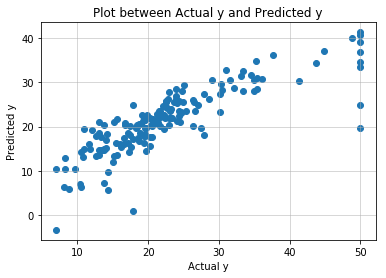

mean sq error= 29.481510267632803
number of iteration= 1
Weight = [-0.91430557  0.2640852  -0.56994749  0.82424474 -0.52159183  3.43578724
 -0.19273805 -1.87387027  1.21145892 -0.50978398 -1.39346396  0.9742262
 -2.63265866]


In [10]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant',
                                    eta0=0.01, n_iter=1)

In [11]:
CurrentRow = [1, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1, error_sgd, w_sgd] 

results.loc[0] = CurrentRow

### 2. n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


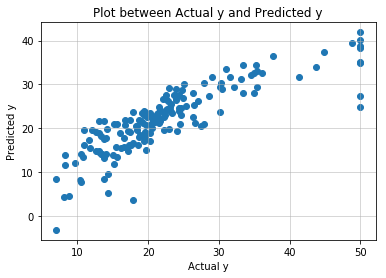

mean sq error= 26.95804646742456
number of iteration= 100
Weight = [-1.32286365  0.70726765 -0.12442224  0.70053428 -1.47781909  2.45047239
 -0.25954254 -2.9210959   3.28328673 -2.0784932  -1.78705286  0.79066796
 -3.37655173]


In [12]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant',
                                    eta0=0.01, n_iter=100)

In [13]:
CurrentRow = [3, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 100, error_sgd, w_sgd] 

results.loc[1] = CurrentRow

### 3. n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


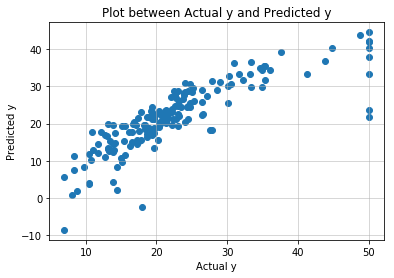

mean sq error= 29.044332508840498
number of iteration= 1000
Weight = [-1.19810697  0.71353903 -0.18578204  0.37424116 -1.33953519  3.25825709
 -0.32060201 -2.87135532  2.82244015 -2.45665045 -2.16329548  1.11042311
 -3.69744289]


In [14]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant',
                                    eta0=0.01, n_iter=1000)

In [15]:
CurrentRow = [5, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 1000, error_sgd, w_sgd] 

results.loc[2] = CurrentRow

### 4. n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


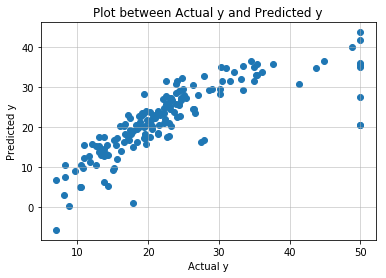

mean sq error= 33.56448850340284
number of iteration= 1000
Weight = [-1.3489629   1.04756805 -0.43419735  0.10697253 -1.89316055  2.10777227
 -0.48190115 -2.53801046  2.4973786  -2.64080373 -2.36676139  0.930429
 -2.90424109]


In [16]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant',
                                    eta0=0.01, n_iter=1000)

In [17]:
CurrentRow = [7, 'SGDRegressor', 0.0001, 'constant', 0.01, 0.25, 10000, error_sgd, w_sgd] 

results.loc[3] = CurrentRow

### Manual SGD

In [18]:
# this function is a simple implementation of sgd to linear regression, here we didn't use any regularization
# we need to provide the pandas data with price, initial learning rate , and learning rate variation, number of iteration
# here we have implemented constant learning rate and invscaling learning rate
# checking the significant difference in loss i.e stopping condition might take lots of time so here we fix the number of loop 
# this function returns weight (w) and bias (b)
# here we have taken sgd with batch size=10
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(10):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
        
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(X_test,y_pred):
    #scatter plot
    plt.scatter(y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.show()
    
    
    
       ## Mean Squared Error
    mse_manual=mean_squared_error(y_test,y_pred)
    print('error=',mse_manual)
    
    
    return mse_manual

### 1. n_iter=1, lr_rate=0.01, lr_rate_variation='constant'

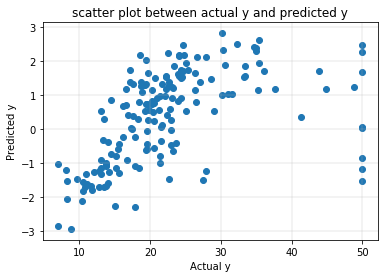

error= 573.0282881278649
Weights [[-0.14213782  0.10999786 -0.17486103 -0.11851829 -0.18426362  0.04859582
  -0.0966473   0.14464764 -0.20222064 -0.26201099 -0.05863657  0.14516687
  -0.15593598]]


In [19]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [20]:
CurrentRow = [2, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1, manual_error, w_sgd] 

results.loc[4] = CurrentRow

### 2. n_iter=100, lr_rate=0.01, lr_rate_variation='constant'

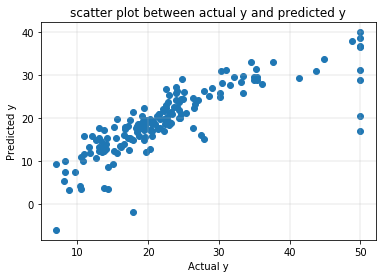

error= 39.08021135677297
Weights [[-0.87827016  0.81674393 -0.16706871  0.56899826 -0.42805711  3.16172402
   0.22060179 -1.04665586  0.55995345 -0.21579031 -1.85160201  0.89881133
  -2.81990832]]


In [21]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=100)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [22]:
CurrentRow = [4, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 100, manual_error, w_sgd] 

results.loc[5] = CurrentRow

### 3. n_iter=1000, lr_rate=0.01, lr_rate_variation='constant'

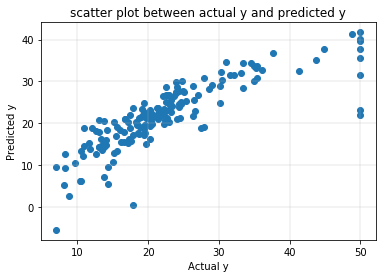

error= 28.852359454647047
Weights [[-1.27645586  0.82447999 -0.05915464  0.13386796 -1.08427894  2.96354307
  -0.53848543 -2.6470653   2.15499102 -1.49510664 -1.98144061  1.12578202
  -3.06618082]]


In [23]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=1000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [24]:
CurrentRow = [6, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 1000, manual_error, w_sgd] 

results.loc[6] = CurrentRow

### 4. n_iter=10000, lr_rate=0.01, lr_rate_variation='constant'

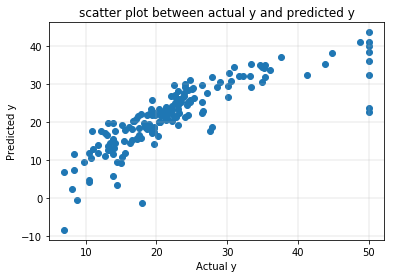

error= 29.56696689069725
Weights [[-1.47778124  0.8467222   0.03096247  0.34564092 -1.58733059  2.69256385
  -0.49617779 -2.62796527  2.99659672 -2.28541624 -2.12390988  1.25296226
  -3.50817314]]


In [25]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' , n_iter=10000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [26]:
CurrentRow = [8, 'manual sgd', 0.0001, 'constant', 0.01, 0.25, 10000, manual_error, w_sgd] 

results.loc[7] = CurrentRow

In [27]:
results

,S_No,Algorithm,Alpha,LearningRateVariation,Learning Rate,Power_t,No. of Iterations,Mean Squared Error,Weights
0,1,SGDRegressor,0.0001,constant,0.01,0.25,1,29.481510,"[-0.9143055718151797, 0.26408520417730996, -0...."
1,3,SGDRegressor,0.0001,constant,0.01,0.25,100,26.958046,"[-1.322863648690995, 0.7072676459443368, -0.12..."
2,5,SGDRegressor,0.0001,constant,0.01,0.25,1000,29.044333,"[-1.1981069656915326, 0.7135390259322174, -0.1..."
3,7,SGDRegressor,0.0001,constant,0.01,0.25,10000,33.564489,"[-1.3489629036744204, 1.047568050568842, -0.43..."
4,2,manual sgd,0.0001,constant,0.01,0.25,1,573.028288,"[-1.3489629036744204, 1.047568050568842, -0.43..."
5,4,manual sgd,0.0001,constant,0.01,0.25,100,39.080211,"[-1.3489629036744204, 1.047568050568842, -0.43..."
6,6,manual sgd,0.0001,constant,0.01,0.25,1000,28.852359,"[-1.3489629036744204, 1.047568050568842, -0.43..."
7,8,manual sgd,0.0001,constant,0.01,0.25,10000,29.566967,"[-1.3489629036744204, 1.047568050568842, -0.43..."


### B) Using Learning Rate=0.01 , Learning rate variation='invscaling' and changing the n_iter

### SGD Regressor

### 1. n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


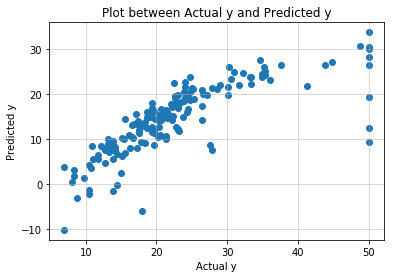

mean sq error= 100.83395469884502
number of iteration= 1
Weight = [-0.90196227  0.2561243  -0.67946437  0.51610788 -0.46647093  2.66755782
 -0.44917147 -0.62204958 -0.08129227 -0.54379675 -1.68472578  0.6797482
 -2.25616864]


In [28]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling',
                                    eta0=0.01, n_iter=1)

In [29]:
CurrentRow = [9, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1, error_sgd, w_sgd] 

results.loc[8] = CurrentRow

### 2. n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


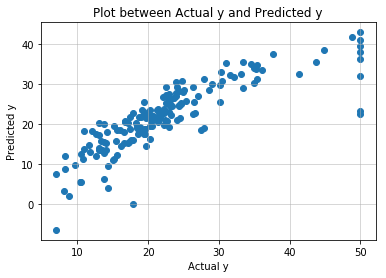

mean sq error= 28.54040929800437
number of iteration= 100
Weight = [-1.29569851  0.84097656 -0.2743541   0.20745838 -1.48542625  2.81108292
 -0.35496792 -2.79070341  2.63896432 -1.91173247 -2.12906002  1.05656176
 -3.33475405]


In [30]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling',
                                    eta0=0.01, n_iter=100)

In [31]:
CurrentRow = [11, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 100, error_sgd, w_sgd] 

results.loc[9] = CurrentRow

### 3. n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


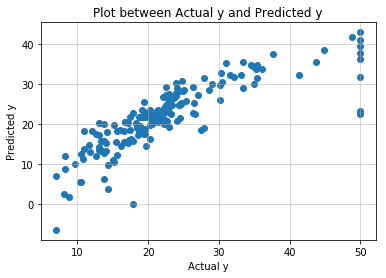

mean sq error= 28.65362316262727
number of iteration= 1000
Weight = [-1.31836267  0.87201796 -0.17667627  0.18924573 -1.4985606   2.79186633
 -0.33601483 -2.76074972  2.96899959 -2.28315697 -2.13735114  1.06530664
 -3.34407434]


In [32]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling',
                                    eta0=0.01, n_iter=1000)

In [33]:
CurrentRow = [13, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 1000, error_sgd, w_sgd] 

results.loc[10] = CurrentRow

### 4. n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

C:\Users\keert\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


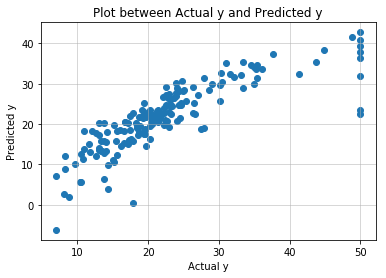

mean sq error= 28.53520992749999
number of iteration= 10000
Weight = [-1.31265412  0.86198006 -0.16668055  0.18882293 -1.4881431   2.78838688
 -0.32532855 -2.77249143  2.97717228 -2.27260931 -2.13286412  1.05705312
 -3.33465165]


In [34]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='invscaling',
                                    eta0=0.01, n_iter=10000)

In [35]:
CurrentRow = [15, 'SGDRegressor', 0.0001, 'invscaling', 0.01, 0.25, 10000, error_sgd, w_sgd] 

results.loc[11] = CurrentRow

### Manual SGD

### 1. n_iter=1, lr_rate=0.01, lr_rate_variation='invscaling'

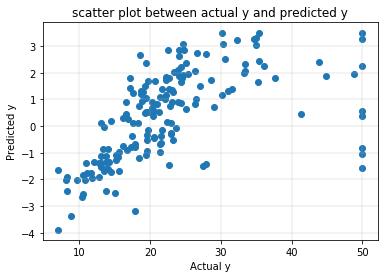

error= 567.7262255075298
Weights [[-0.1588807   0.16548894 -0.26940872 -0.12859183 -0.19169067  0.24775931
  -0.18101753  0.1672872  -0.15435236 -0.14795246 -0.07459212  0.16365762
  -0.27226597]]


In [36]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [37]:
CurrentRow = [10, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 1, manual_error, w_sgd] 

results.loc[12] = CurrentRow

### 2. n_iter=100, lr_rate=0.01, lr_rate_variation='invscaling'

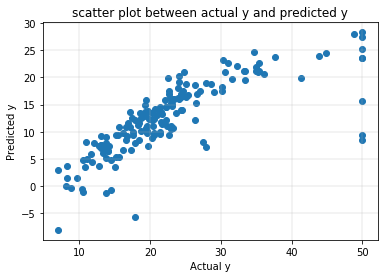

error= 135.80549402365295
Weights [[-0.44715175  0.25545932 -0.55707982 -0.06878681 -0.34135437  2.4730373
  -0.60595658 -0.84764449 -0.00960143 -0.41429446 -1.70163063  0.75504323
  -2.06458481]]


In [38]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=100)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [39]:
CurrentRow = [12, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 100, manual_error, w_sgd] 

results.loc[13] = CurrentRow

### 3. n_iter=1000, lr_rate=0.01, lr_rate_variation='invscaling'

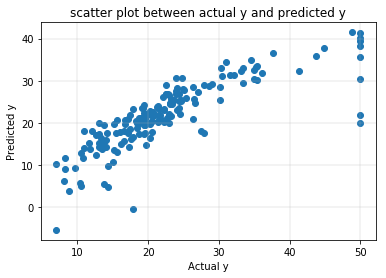

error= 30.319088565397507
Weights [[-1.04734323  0.26591553 -0.45643034  0.20531643 -0.62287612  3.18064897
  -0.62334499 -1.83274805  0.91784911 -0.41279811 -2.09545499  0.96290067
  -2.99137575]]


In [40]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=1000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [41]:
CurrentRow = [14, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 1000, manual_error, w_sgd] 

results.loc[14] = CurrentRow

### 4. n_iter=10000, lr_rate=0.01, lr_rate_variation='invscaling'

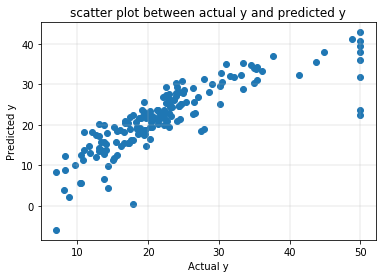

error= 28.336266651641758
Weights [[-1.27298693  0.86482967 -0.3709973   0.2684559  -1.51667997  2.72368791
  -0.33070765 -2.84616118  2.37748427 -1.67794415 -2.08404731  1.05168615
  -3.29848774]]


In [42]:
w, b=manual_fit(X=manual_train, lr_rate_variation='invscaling' , n_iter=10000)
y_pred=pred(X_test, w=w, b=b)
manual_error=plot_(X_test,y_pred)
print('Weights',w)

In [43]:
CurrentRow = [16, 'manual sgd', 0.0001, 'invscaling', 0.01, 0.25, 10000, manual_error, w_sgd] 

results.loc[15] = CurrentRow

In [44]:
results

,S_No,Algorithm,Alpha,LearningRateVariation,Learning Rate,Power_t,No. of Iterations,Mean Squared Error,Weights
0,1,SGDRegressor,0.0001,constant,0.01,0.25,1,29.481510,"[-0.9143055718151797, 0.26408520417730996, -0...."
1,3,SGDRegressor,0.0001,constant,0.01,0.25,100,26.958046,"[-1.322863648690995, 0.7072676459443368, -0.12..."
2,5,SGDRegressor,0.0001,constant,0.01,0.25,1000,29.044333,"[-1.1981069656915326, 0.7135390259322174, -0.1..."
3,7,SGDRegressor,0.0001,constant,0.01,0.25,10000,33.564489,"[-1.3489629036744204, 1.047568050568842, -0.43..."
4,2,manual sgd,0.0001,constant,0.01,0.25,1,573.028288,"[-1.3489629036744204, 1.047568050568842, -0.43..."
5,4,manual sgd,0.0001,constant,0.01,0.25,100,39.080211,"[-1.3489629036744204, 1.047568050568842, -0.43..."
6,6,manual sgd,0.0001,constant,0.01,0.25,1000,28.852359,"[-1.3489629036744204, 1.047568050568842, -0.43..."
7,8,manual sgd,0.0001,constant,0.01,0.25,10000,29.566967,"[-1.3489629036744204, 1.047568050568842, -0.43..."
8,9,SGDRegressor,0.0001,invscaling,0.01,0.25,1,100.833955,"[-0.9019622701315364, 0.25612430365915334, -0...."
9,11,SGDRegressor,0.0001,invscaling,0.01,0.25,100,28.540409,"[-1.2956985109460581, 0.8409765568685529, -0.2..."


### Conclusion
   - For SGDRegressor with constant learning rate variation MSE did not change much with increase in iterations
   - For SGDRegressor with invscaling learning rate variation MSE changed with increase in iterations and majority change is seen when iteration changed from 1 to 100
   - The above point is valid for Manual SGD Regressor
   - Among all the MSE variation is seen in manual SGD Regressor at iteration 1 and 100